In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("gold fund.csv")

In [11]:
df.head()

In [5]:
#separate features and ouctome
x=df.iloc[:,1:-1]
y=df.Gold_Fund

In [7]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [8]:
#standardise the data
from sklearn.preprocessing import StandardScaler

In [9]:
stdSc=StandardScaler()
stdSc.fit(x_train)

StandardScaler()

In [10]:
x_train_std=stdSc.transform(x_train)
x_test_std=stdSc.transform(x_test)

In [12]:
#build network
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
# in case KERAS not found
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [17]:
model=Sequential()
#hidden layer
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
#output layer
model.add(Dense(1,activation='sigmoid')) # for binary classification we use SIGMOID only as activation at output


model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [19]:
from livelossplot import PlotLossesKeras

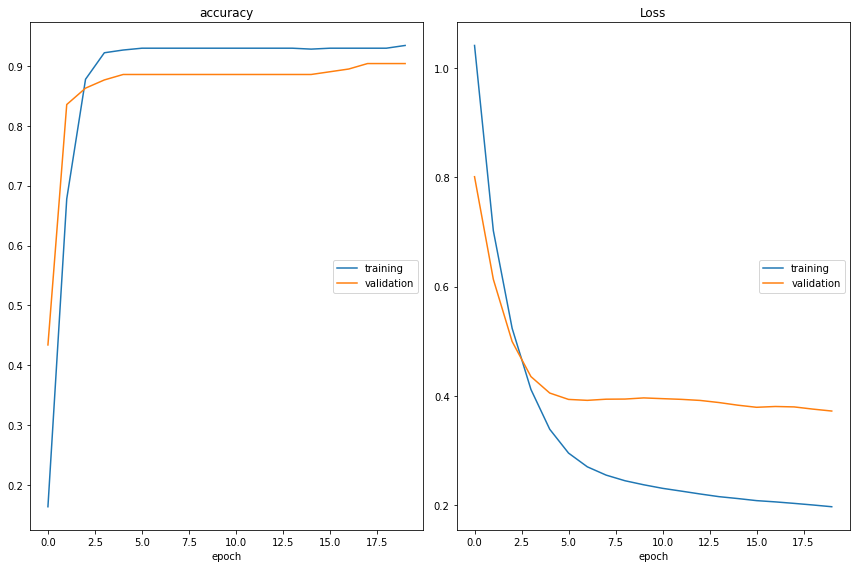

accuracy
	training         	 (min:    0.163, max:    0.934, cur:    0.934)
	validation       	 (min:    0.434, max:    0.904, cur:    0.904)
Loss
	training         	 (min:    0.197, max:    1.041, cur:    0.197)
	validation       	 (min:    0.372, max:    0.801, cur:    0.372)
21/21 [==============================] - 0s 20ms/step - loss: 0.1975 - accuracy: 0.9344 - val_loss: 0.3724 - val_accuracy: 0.9041


In [20]:
model.fit(x_train_std,y_train,epochs=20,callbacks=[PlotLossesKeras()],validation_data=(x_test_std,y_test))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  320       
_________________________________________________________________
dense_4 (Dense)              multiple                  420       
_________________________________________________________________
dense_5 (Dense)              multiple                  21        
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


In [22]:
print(x_train.shape)
print(y_train.shape)

(655, 15)
(655,)
